In [15]:
import numpy as np
import os, sys
from skimage import io
import matplotlib
from pprint import pprint
from matplotlib import pyplot as plt
from tqdm import tqdm
import cv2
import neuroglancer

In [3]:
HOME = os.path.expanduser("~")
filepath = os.path.join(HOME, 'work', 'AllenRefVolCoronal_10_ds222.tif')
tif = io.imread(filepath)
print(type(tif), tif.shape, tif.dtype)

<class 'numpy.ndarray'> (660, 400, 570) uint8


In [4]:
volume = np.swapaxes(tif, 0,2)
print(volume.shape, volume.dtype, np.amin(volume), np.amax(volume), np.mean(volume))

(570, 400, 660) uint8 0 255 48.23379425837321


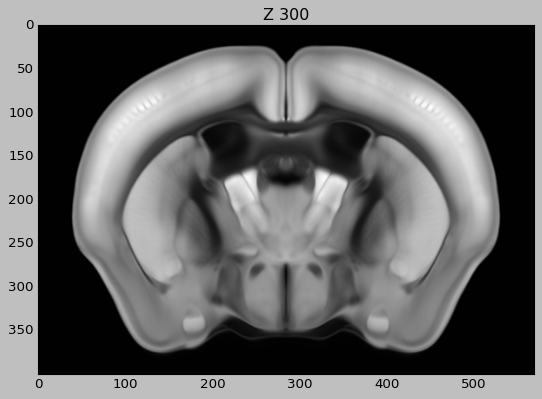

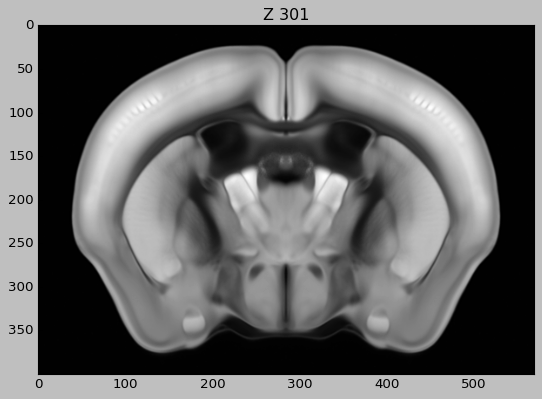

In [13]:
arr = volume.copy()
#arr = np.rot90(volume, axes=(0,1))
arr = np.rot90(arr, 3)
#arr = np.flip(arr, axis=1)    
start = 300
end = start + 2
plt.style.use('classic')
for i in range(start, end,1):
    plt.title('Z {}'.format(i))
    plt.imshow(arr[:,:,i], cmap="gray")
    plt.show()

In [16]:
dimensions = neuroglancer.CoordinateSpace(
    names=['x', 'y', 'z'],
    units='nm',
    scales=[1000,1000,1000])

viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.dimensions = dimensions
    s.layers['Altas'] = neuroglancer.ImageLayer(
        source=neuroglancer.LocalVolume(
            data=volume,
            dimensions=dimensions,
            voxel_offset=(0, 0, 0),
        ),
        shader="""
#uicontrol float min slider(min=0, max=1, default=0)
#uicontrol float max slider(min=0, max=1, default=1)
#uicontrol float invert slider(min=0, max=1, default=0, step=1)
#uicontrol float brightness slider(min=-1, max=1)
#uicontrol float contrast slider(min=-3, max=3, step=0.01)
void main() {
  float pix_val = toNormalized(getDataValue());
  if(pix_val < min){
  	pix_val = 0.0;
  }
  if(pix_val > max){
    pix_val = 1.0;
  }

  if(invert==1.0){
  	  emitGrayscale((1.0 -(pix_val - brightness)) *
       exp(contrast));
  }
  else{
    emitGrayscale((pix_val + brightness) *
                  exp(contrast));
  }

}

""")
print(viewer)

http://127.0.0.1:42441/v/67115d15685ec25cef1c8b5a37519defaf2e1368/


In [17]:
OUTPATH = os.path.join(HOME, 'work','tifs')
arr = volume.copy()
arr = np.rot90(arr, 3)
start = 0
end = arr.shape[2]
for i in range(start, end,1):
    outfile = str(i).zfill(3) + '.tif'
    outpath = os.path.join(OUTPATH, outfile)
    cv2.imwrite(outpath, arr[:,:,i])